In [1]:
import pandas as pd
import numpy as np
import os
import torch
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

sns.set_style("white", {
    'axes.grid' : False
})

import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
torch.__version__, pd.__version__, sns.__version__

('1.7.0', '1.1.4', '0.11.0')

In [3]:
exp_name = "test_ppo_lunar"
rootdir = f"spinningup-master/data/{exp_name}/"
# data_path = "/Users/saipiens/repos/effect_size_variance/toy_example/data/"
NUM_RUNS = 250
num_sub_runs = [3, 5, 10, 30, 50, 100, 150, 200, 250]
N_COLS = 1
N_ROWS = len(num_sub_runs)

for run in range(NUM_RUNS):
    exp_suffix = f"{exp_name}_s{run}"
    data = pd.read_csv(os.path.join(rootdir, exp_suffix, 'progress.txt'), sep="\t", header=0)
    checkpoint = data.TotalEnvInteracts[0]
    num_epochs = data.Epoch
    num_epochs = len(num_epochs)
    num_steps = checkpoint*num_epochs
    avgrets = data.AverageEpRet.to_numpy()
    
    data = np.zeros((2, len(avgrets)))
    data[0] = range(checkpoint, num_steps + 1, checkpoint)
    data[1] = avgrets

In [4]:
auc_runs = np.mean(data, axis=1)
end_runs = np.mean(data[:, -1:], axis=1)
start_runs = np.mean(data[:, :1], axis=1)

[4.000000e+05 9.045256e+00]
[4.000000e+05 9.045256e+00]


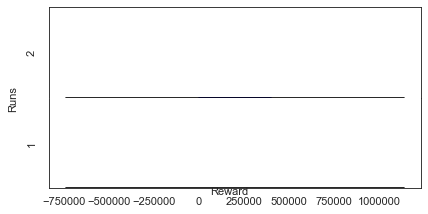

In [6]:
fig, axes = plt.subplots(
        nrows=N_ROWS,
        ncols=N_COLS,
        sharex=True,
        sharey=True,
        figsize=(6*N_COLS, 1.5*N_ROWS),
        dpi=80
    )
fig.text(0.5, 0.1, 'Reward', ha='center')
fig.text(0.04, 0.5, 'Runs', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0)

for i, j, ax in zip(range(N_ROWS*N_COLS), reversed(num_sub_runs), axes.flat):
    ax.set(ylabel = f"{j}")
    ax.set_yticklabels([])
    # Hide the right and top spines
    if i == 0:
        ax.spines['top'].set_visible(True)
    else:
        ax.spines['top'].set_visible(False)
    if i == N_ROWS-1:
        ax.spines['bottom'].set_visible(True)
    else:
        ax.spines['bottom'].set_visible(False)
    sns.histplot(end_runs[:j], kde=True, stat="density", fill=True, ax=ax, color="blue")
    sns.kdeplot(end_runs, ax=ax, color="black")
plt.show()